# Neural networks

We discuss neural networks in a bottom-up approach:
1. Perceptron
2. Hidden layer
3. Multi-layer perceptron

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### The Perceptron

The simplest variant of the **perceptron** consists of:
- linear combination of inputs and weights (weighted sum or dot-product)
- a threshold function $f$

Given $d$ inputs $x_1, x_2, \dots, x_d$, we compute
$$
    y = f\left(\sum_{j = 1}^d w_j x_j + w_0\right)
$$
where 
$$
    f(x) = \begin{cases}
        1 & \text{if $x > 0$}\\
        0 & \text{otherwise}
    \end{cases}
$$
is called the **activation function**, i.e., it models the stimuli in a biological neuron.

Example use-cases of the perception are learning linearly separable **logic gates**:
- learn the logical **AND-gate**
- learn the logical **OR-gate**

In [2]:
# threshold function "vectorized", so that we can apply it on numpy arrays
f = np.vectorize(lambda x: 1 if x > 0 else 0)

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

# parameters chosen by hand (without machine learning)
and_gate = lambda x1, x2: f(1*x1 + 1*x2 - 1.5)
or_gate = lambda x1, x2: f(1*x1 + 1*x2 - 0.5)

print(f"AND gate outputs: {and_gate(X[:, 0], X[:, 1])}")
print(f"OR gate outputs:  {or_gate(X[:, 0], X[:, 1])}")

AND gate outputs: [0 0 0 1]
OR gate outputs:  [0 1 1 1]


[]

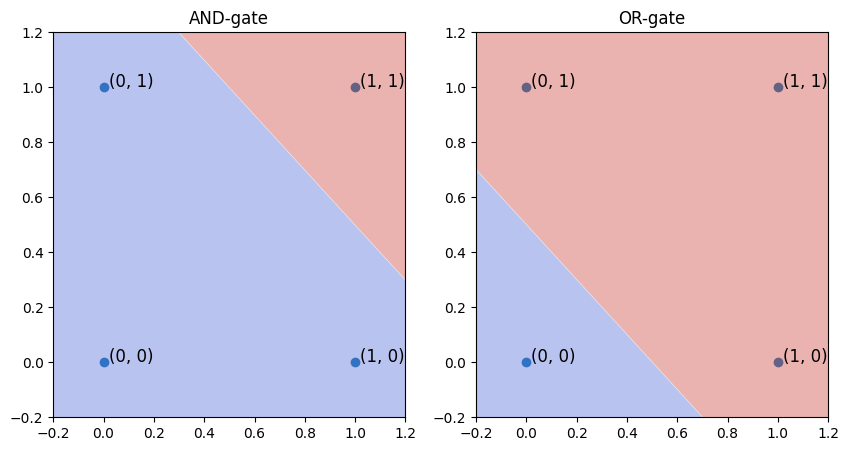

In [3]:
xx, yy = np.meshgrid(
    np.linspace(-0.2, 1.2, 300), 
    np.linspace(-0.2, 1.2, 300) 
)
D = np.vstack((xx.flatten(), yy.flatten())).T

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(X[:, 0], X[:, 1])
axes[1].scatter(X[:, 0], X[:, 1])
for x1, x2 in X:
    axes[0].annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)
    axes[1].annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)

axes[0].set_title("AND-gate")
axes[1].set_title("OR-gate")

axes[0].contourf(xx, yy, and_gate(D[:, 0], D[:, 1]).reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)
axes[1].contourf(xx, yy, or_gate(D[:, 0], D[:, 1]).reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)
plt.plot()

Some observations:
- The perceptron is a model for an **articial neuron**. 
- The perceptron defines a **lineaire discriminant**, meaning that it cannot solve the non-linear XOR-gate. 
- Threshold function $f$ is a *hard* thresholding function. Later, we will look at the **sigmoid** function which is a *soft* thresholding function.

**Key idea**: we can stack multiple perceptron to form a layer of perceptron. This allows us to solve non-linear problems (such as XOR). 

### Exclusive Or (XOR)

|x1|x2|XOR|
|-|-|-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

$x_1 \text{ XOR } x_2 = (x_1 \text{ AND } \text{ NOT } x_2) \text{ OR } (\text{ NOT } x_1 \text{ AND } x_2)$

$x_1 \oplus x_2 = (x_1 \land \neg x_2) \lor (\neg x_1 \land x_2)$

#### Exercise: design the XOR gate

Requirements
- Design a NOT-gate in the form of $f(w x + b)$, where $f$ is the thresholding function and $w, b$ are the parameters of this model.
- Combine the AND-gate, OR-gate, and NOT-gate to get the XOR-gate

```python
f = np.vectorize(lambda x: 1 if x > 0 else 0)
and_gate = lambda x1, x2: f(1*x1 + 1*x2 - 1.5)
or_gate  = lambda x1, x2: f(1*x1 + 1*x2 - 0.5)
```

In [4]:
not_gate = lambda x: ()

xor_gate = lambda x1, x2: ()

print(f"XOR gate outputs:  {xor_gate(X[:, 0], X[:, 1])}")

XOR gate outputs:  ()


```














```

In [5]:
# NOT gate
not_gate = lambda x: f(-1*x + 0.5)

not_gate(0), not_gate(1)

(array(1), array(0))

In [6]:
xor_gate = lambda x1, x2: or_gate(and_gate(x1, not_gate(x2)), and_gate(not_gate(x1), x2))

print(f"XOR gate outputs:  {xor_gate(X[:, 0], X[:, 1])}")

XOR gate outputs:  [0 1 1 0]


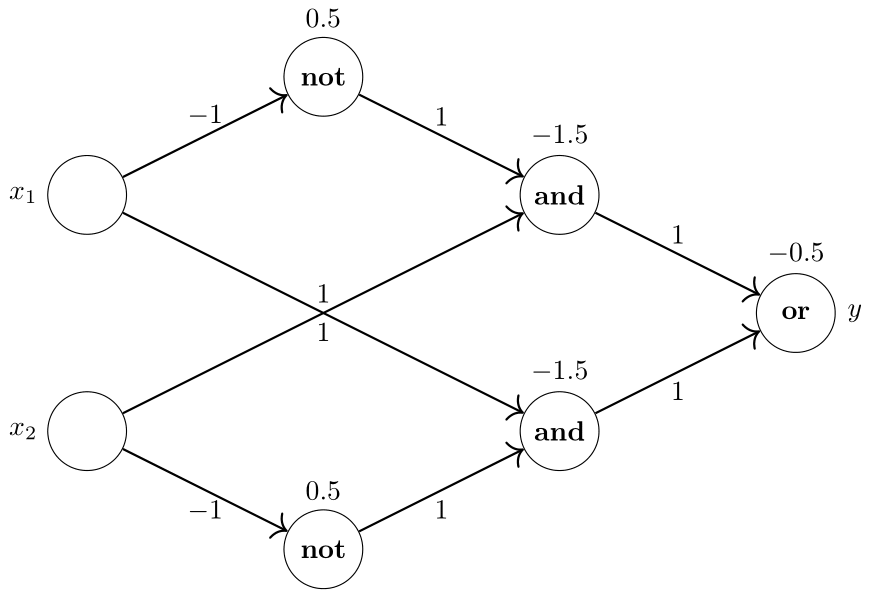

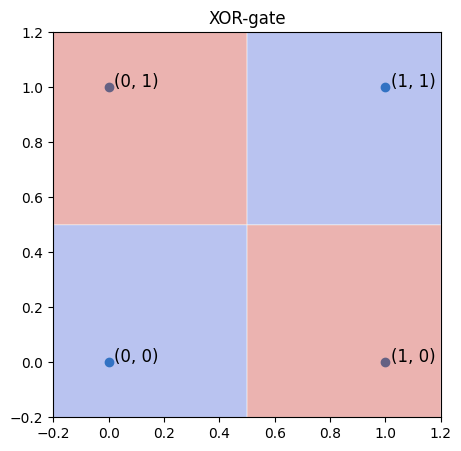

In [7]:
xx, yy = np.meshgrid(
    np.linspace(-0.2, 1.2, 300), 
    np.linspace(-0.2, 1.2, 300) 
)
D = np.vstack((xx.flatten(), yy.flatten())).T

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1])
for x1, x2 in X:
    plt.annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)

plt.title("XOR-gate")
plt.contourf(xx, yy, xor_gate(D[:, 0], D[:, 1]).reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)
plt.show()

### Example of a simple neural network

Example network:
- 1 input `x`
- 1 'hidden' layer with parameter `w1`
- 1 output `y` with parameter `w2`
- sigmoid activation function instead of hard threshold function
$$
    \text{sigmoid}(x) = \dfrac{1}{1 + e^{-x}}
$$

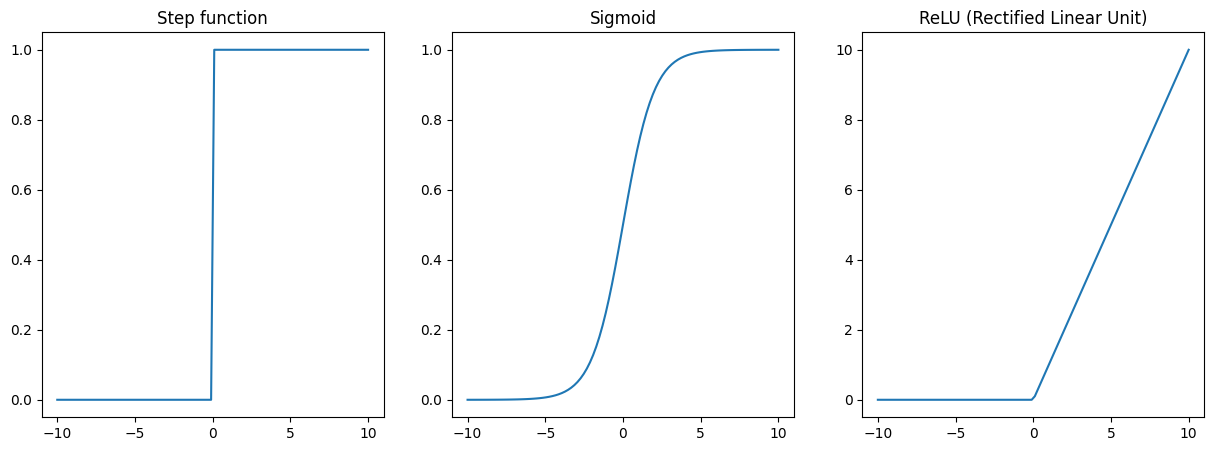

In [8]:
x = np.linspace(-10, 10, 100)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sigmoid = lambda x: 1/(1+np.exp(-x))

ax1.plot(x, f(x))
ax1.set_title("Step function")
ax2.plot(x, sigmoid(x))
ax2.set_title("Sigmoid")
ax3.plot(x, x * (x > 0))
ax3.set_title("ReLU (Rectified Linear Unit)")
plt.show()

### Information flow
```
                ___________             
    x -- w1 --> | sigmoid | -- w2 --> y
                -----------            
```
In mathematical notation:

$z = \text{sigmoid}(w_1 x)$

$y = w_2 z$

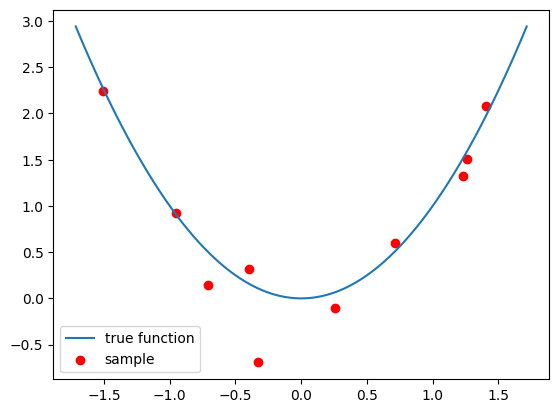

In [106]:
g = lambda x: x**2

x = np.linspace(-10, 10, 100)
x = (x - x.mean()) / x.std()
y = g(x) #+ np.random.normal(0, 0.1, size=x.shape[0])

idx = np.random.choice(x.shape[0], size=10)
x_train = x[idx]
y_train = y[idx] + np.random.normal(0, 0.3, size=y[idx].shape)

plt.plot(x, y, label='true function')
plt.scatter(x_train, y_train, c='r', label='sample')
plt.legend()

# weights initialised with mean 0 and variance 2
w1 = np.random.normal(0, 2)
w2 = np.random.normal(0, 2)

We use the Mean-Squared-Error (MSE) loss function to capture how much of the predictions are wrong
$$
    MSE(\textbf{y}, \hat{\textbf{y}}) = \dfrac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
$$

In [107]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# feedforward model
def predict(x, w1, w2):
    z = sigmoid(x * w1)
    y = z * w2
    return z, y

# MSE loss function
loss_func = lambda y_true, y_pred: 1/y_true.shape[0] * np.sum((y_true - y_pred)**2, axis=-1)

Initially, the weights are not (yet) correct, as seen by the high MSE loss

In [108]:
_, y_pred = predict(x_train, w1, w2)
loss = loss_func(y_train, y_pred)
loss

np.float64(3.832755657101618)

For many combinations of `w1` and `w2`, we can compute the loss and visualize the loss *landschap*

(np.float64(3.832755657101618), -3.4969129385104605, -1.7503757765896644)

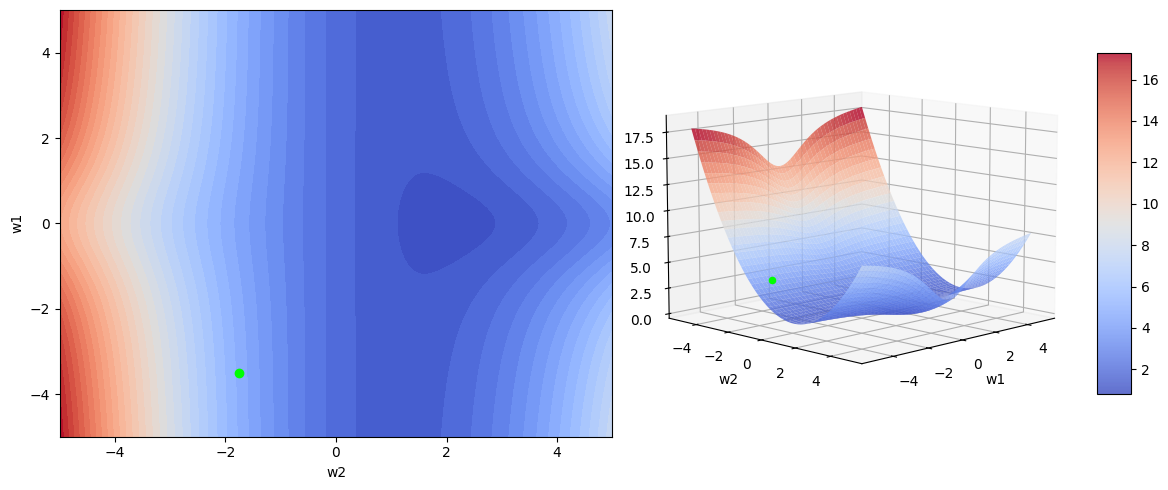

In [109]:
# try many w1, w2 pairs
w1_range = np.linspace(-5, 5, 300)
w2_range = np.linspace(-5, 5, 300)
w1_space, w2_space = np.meshgrid(w1_range, w2_range)

# get prediction for all (w1, w2) pairs 
_, y_preds = predict(x, w1_range[..., None], w2_range[..., None, None])
losses = loss_func(y, y_preds)

# predict train set
_, y_pred = predict(x_train, w1, w2)
sample_loss = loss_func(y_train, y_pred)

# loss landscape
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
cont1 = ax.contourf(w2_space, w1_space, losses, 40, cmap='coolwarm')
ax.set_xlabel("w2")
ax.set_ylabel("w1")

ax.scatter(w2, w1, c='lime')

# 3d plot
ax = fig.add_subplot(1, 2, 2, projection='3d', computed_zorder=False)
surf = ax.plot_surface(w1_space, w2_space, losses, cmap='coolwarm', alpha=0.8)
fig.colorbar(surf, shrink=0.8, aspect=10, ax=ax)
# ax.view_init(90, 0)
ax.view_init(10, 45)
ax.invert_xaxis()
ax.set_xlabel("w1")
ax.set_ylabel("w2")

ax.scatter([w1], [w2], [sample_loss], c='lime')

plt.tight_layout()
sample_loss, w1, w2

- Goal is to minimize the loss. 
- We use **gradient descent** by applying changes to `w1`, `w2` such that we are descending from the loss mountain.
- We see that if `w2 = 2` en `w1 = 0`, then we have descended the mountain

In [110]:
_, y_pred = predict(x_train, w1=0, w2=2)
sample_loss = loss_func(y_train, y_pred)
sample_loss

np.float64(0.8523294670320528)

### Optimization with gradient descent (backpropagation)

We apply calculus to find the gradient (i.e., derivative in more than one dimension)

**Analogy**: you are blindfolded on top of a mountain and need to descent the mountain.

Find the largest slope by feeling (probing) in every direction. 

**Key idea**: Iterative process where we update the weights ($w_1$, $w_2$) by subtracting the **rate of change of the loss with respect to the weights**. 

#### Step 1: Forward propagation

We can describe our feedforward model in a sequential way:
\begin{align*}
    a &= w_1 \cdot x \\
    z &= \text{sigmoid}(a)\\
    \hat{y} &= w_2 \cdot z\\
\end{align*}

Compute $\hat{y}_i$ for each value in a batch of examples $x_i \in \{x_1, x_2, x_3, \dots, x_n\}$.

The loss measured via MSE is:
$$
    L = \frac{1}{2} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$
For numerical convenience we use the factor $1/2$, instead of $1/N$. The learning rate $\eta$ will account for this.

#### Step 2: Backward propagation

We need to differentiate $L$ with respect to $w_1$ and $w_2$

1. The rate of change of the loss $L$ with respect to the weight $w_2$:
\begin{align*}
    \dfrac{\partial L}{\partial w_2} &= \dfrac{\partial L}{\partial \hat{y}} \dfrac{\partial \hat{y}}{\partial w_2} \qquad \text{\# chain rule of calculus}\\
    \dfrac{\partial L}{\partial w_2} &= \underbrace{\sum_{i=1}^n (y_i - \hat{y}_i)}_{\dfrac{\partial L}{\partial \hat{y}}} \;\;\underbrace{z_i}_{\dfrac{\partial \hat{y}}{\partial w_2}} 
\end{align*}

2. The rate of change of the loss $L$ with respect to the weight $w_1$:
\begin{align*}
    \dfrac{\partial L}{\partial w_1} &= \dfrac{\partial L}{\partial \hat{y}} \dfrac{\partial \hat{y}}{\partial z} \dfrac{\partial z}{\partial a} \dfrac{\partial a}{\partial w_1} \qquad \text{\# chain rule of calculus}\\
    \dfrac{\partial L}{\partial w_1} &= \underbrace{\sum_{i=1}^n (y_i - \hat{y}_i)}_{\dfrac{\partial L}{\partial \hat{y}}} \;\;\underbrace{w_2}_{\dfrac{\partial \hat{y}}{\partial z}} \;\; \underbrace{z_i(1-z_i)}_{\dfrac{\partial z}{\partial a}} \;\; \underbrace{x_i}_{\dfrac{\partial a}{\partial w_1}}
\end{align*}

#### Step 3: Gradient descent

Update $w_1$ and $w_2$ according to the calculated gradients by taking a small step in the negative direction:

Update rule $w_2$ is the learning rate $\eta$ times the derivative of $L$ with respect to $w_2$:
\begin{align*}
    w_2^{\text{new}} &= w_2^{\text{old}} - \eta \dfrac{L}{w_2^{\text{old}}} \\ 
    w_2^{\text{new}} &= w_2^{\text{old}} - \eta \sum_{i=1}^n (y_i - \hat{y}_i) z_i
\end{align*}

Update rule $w_1$ is the learning rate $\eta$ times the derivative of $L$ with respect to $w_1$:
\begin{align*}
    w_1^{\text{new}} &= w_1^{\text{old}} - \eta \dfrac{L}{w_1^{\text{old}}} \\ 
    w_1^{\text{new}} &= w_1^{\text{old}} - \eta \sum_{i=1}^n (y_i - \hat{y}_i) w_2 z_i(1-z_i)x_i
\end{align*}


**Important considerations**:
- There can be multiple **local optima** 
- Learning rate $\eta$ is a hyperparameter and needs fine-tuning: 
  - High $\eta$ means that the parameter updates are large, potentially missing or over-shooting the minimum.
  - Low $\eta$ means that it can take a very long time before training is finished.

In [151]:
# re-initialize for convenience
w1 = np.random.normal(0, 2)
w2 = np.random.normal(0, 2)

In [152]:
EPOCHS = 10
learning_rate = 0.1

for e in range(EPOCHS):
    z, y_pred = predict(x_train, w1, w2)
    sample_loss = loss_func(y_train, y_pred)
    print(f"Epoch {e}, {sample_loss=}")
    
    # compute updates
    d_w2 = learning_rate * np.sum((y_train - y_pred) * z)
    d_w1 = learning_rate * np.sum((y_train - y_pred) * w2 * z * (1-z) * x_train)

    # update parameters
    w1 += d_w1
    w2 += d_w2

Epoch 0, sample_loss=np.float64(6.179774632694583)
Epoch 1, sample_loss=np.float64(3.176928438782376)
Epoch 2, sample_loss=np.float64(2.0067909116950875)
Epoch 3, sample_loss=np.float64(1.4349236760395583)
Epoch 4, sample_loss=np.float64(1.1339708398111772)
Epoch 5, sample_loss=np.float64(0.9721415536598004)
Epoch 6, sample_loss=np.float64(0.8851474599893717)
Epoch 7, sample_loss=np.float64(0.8389092778089573)
Epoch 8, sample_loss=np.float64(0.8147138193742718)
Epoch 9, sample_loss=np.float64(0.8022434611857219)


## Scaling up

- If we give the model more parameters, it will have higher capacity to learn things 
- We can organize multiple perceptron in a hidden layer

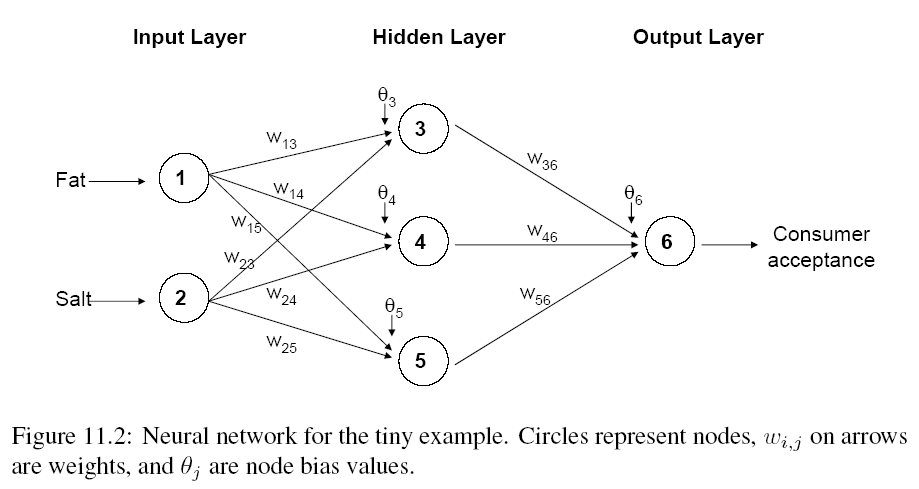

If we want to compute hidden layer node 3 ($\textbf{h}_3$):
\begin{align*}
    \textbf{h}_3 &= f(x_1 w_{13} + x_2 w_{23} + \theta_3)\\
    &= f(\underbrace{\begin{bmatrix} w_{13} & w_{23} & \theta_3 \end{bmatrix} \cdot \begin{bmatrix} x_1 \\ x_2 \\ 1 \end{bmatrix}}_{\text{dot product}})
\end{align*}

If we want to compute the entire hidden layer ($\textbf{h}_3, \textbf{h}_4, \textbf{h}_5$), then we can take the matrix product:
\begin{align*}
    \textbf{z} &= \underbrace{\begin{bmatrix} 
        w_{13} & w_{23} & \theta_3 \\
        w_{14} & w_{24} & \theta_4 \\
        w_{15} & w_{25} & \theta_5 \\
    \end{bmatrix} \cdot \begin{bmatrix} x_1 \\ x_2 \\ 1 \end{bmatrix}}_{\text{matrix-vector product}}\\
    \textbf{z} &= \textbf{W} \textbf{x}\\
    \textbf{h} &= f(\textbf{z})
\end{align*}


http://matrixmultiplication.xyz/

In [18]:
W = np.array([
    [1,  0,  2],
    [-1, 2, -3],
    [3,  0, -4]
])

x = np.array([-3, 2, 1])

z = W @ x

h = f(z)
h

array([0, 1, 0])

## Scaling up the XOR problem

In [19]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
y = np.array([0, 1, 1, 0])

H_DIM = 8 # hyperparameter

W1 = np.random.normal(0, 2, size=(H_DIM, 2))
b1 = np.random.normal(0, 2, size=(H_DIM, 1))

W2 = np.random.normal(0, 2, size=(1, H_DIM))
b2 = np.random.normal(0, 2, size=(1, 1))

h = sigmoid(W1 @ X.T + b1)
y_pred = W2 @ h + b2

y_pred

array([[-8.46745651, -8.5459263 , -9.38146889, -9.70577589]])

In [20]:
EPOCHS = 10
learning_rate = 0.1

for e in range(EPOCHS):
    # feed forward pass
    h = sigmoid(W1 @ X.T + b1)
    y_pred = W2 @ h + b2

    sample_loss = 0.5 * np.sum((y - y_pred)**2)
    print(f"Epoch {e}, {sample_loss=}, \t {y_pred=}")
    
    # backward pass
    d_W2 = learning_rate * np.sum((y - y_pred) * h, axis=1)
    d_b2 = learning_rate * np.sum(y - y_pred)
    
    d_W1 = learning_rate * ((y - y_pred) * W2.T * h * (1-h)) @ X
    d_b1 = learning_rate * np.sum((y - y_pred) * W2.T * (h * (1-h)), axis=1, keepdims=True)

    # update parameters
    W1 += d_W1
    W2 += d_W2
    b1 += d_b1
    b2 += d_b2

Epoch 0, sample_loss=182.39975530116308, 	 y_pred=array([[-8.46745651, -8.5459263 , -9.38146889, -9.70577589]])
Epoch 1, sample_loss=33.73435991364561, 	 y_pred=array([[4.84289248, 4.67769979, 4.52850274, 4.2472703 ]])
Epoch 2, sample_loss=0.48562118062886606, 	 y_pred=array([[0.76434222, 1.14328449, 0.47164951, 0.29553113]])
Epoch 3, sample_loss=0.3991472542177498, 	 y_pred=array([[0.5782094 , 0.98900371, 0.33855911, 0.16230657]])
Epoch 4, sample_loss=0.37239748184993376, 	 y_pred=array([[0.53401598, 0.95949269, 0.34424045, 0.16721386]])
Epoch 5, sample_loss=0.3498335977154683, 	 y_pred=array([[0.50613953, 0.94369156, 0.36257005, 0.18439736]])
Epoch 6, sample_loss=0.3303357250487706, 	 y_pred=array([[0.48170415, 0.93025108, 0.38091188, 0.20124001]])
Epoch 7, sample_loss=0.31342236464367795, 	 y_pred=array([[0.45930723, 0.91798563, 0.3981607 , 0.21666723]])
Epoch 8, sample_loss=0.2986964825017191, 	 y_pred=array([[0.43866426, 0.90669519, 0.41430359, 0.23069583]])
Epoch 9, sample_loss=0

## Sklearn implementation

Iteration 1, loss = 0.73386025
Iteration 2, loss = 0.71586454
Iteration 3, loss = 0.70209565
Iteration 4, loss = 0.68855527
Iteration 5, loss = 0.67486967
Iteration 6, loss = 0.66246213
Iteration 7, loss = 0.65307703
Iteration 8, loss = 0.64381800
Iteration 9, loss = 0.63444246
Iteration 10, loss = 0.62546968
Iteration 11, loss = 0.61532351
Iteration 12, loss = 0.60715409
Iteration 13, loss = 0.59758201
Iteration 14, loss = 0.58798714
Iteration 15, loss = 0.57708816
Iteration 16, loss = 0.56458091
Iteration 17, loss = 0.55226627
Iteration 18, loss = 0.54092272
Iteration 19, loss = 0.52828707
Iteration 20, loss = 0.51559121
Iteration 21, loss = 0.50307833
Iteration 22, loss = 0.48995381
Iteration 23, loss = 0.47716956
Iteration 24, loss = 0.46378636
Iteration 25, loss = 0.45025686
Iteration 26, loss = 0.43649086
Iteration 27, loss = 0.42248575
Iteration 28, loss = 0.40755331
Iteration 29, loss = 0.39280843
Iteration 30, loss = 0.37886569
Iteration 31, loss = 0.36473184
Iteration 32, los

1.0

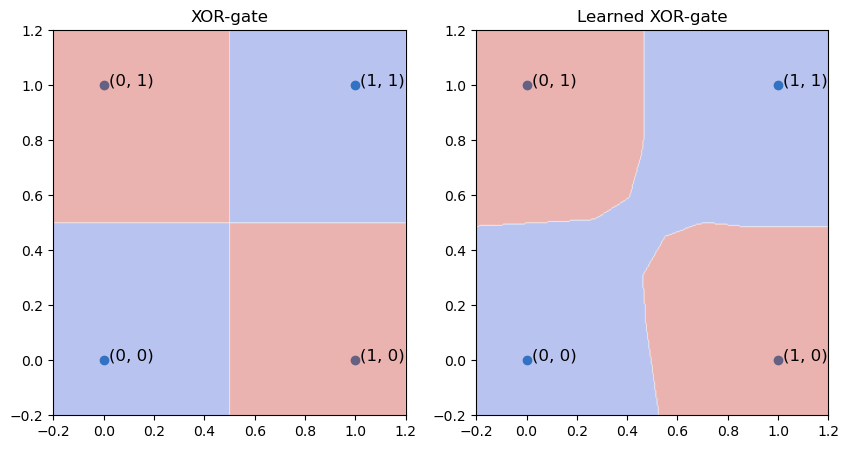

In [21]:
from sklearn.neural_network import MLPClassifier

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
y = np.array([0, 1, 1, 0])

xx, yy = np.meshgrid(
    np.linspace(-0.2, 1.2, 300), 
    np.linspace(-0.2, 1.2, 300) 
)
D = np.vstack((xx.flatten(), yy.flatten())).T

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# hand-chosen weights
ax1.scatter(X[:, 0], X[:, 1])
for x1, x2 in X:
    ax1.annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)
ax1.set_title("XOR-gate")
ax1.contourf(xx, yy, xor_gate(D[:, 0], D[:, 1]).reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)

# train model and predict
mlp = MLPClassifier(tol=1e-6, max_iter=1000, activation="relu", learning_rate_init=0.01, learning_rate='adaptive', 
                    hidden_layer_sizes=[16, 16], verbose=True, solver="adam").fit(X, y)
y_pred = mlp.predict(D)

ax2.scatter(X[:, 0], X[:, 1])
for x1, x2 in X:
    ax2.annotate(f"({x1}, {x2})", (x1+.02, x2), fontsize=12)
ax2.set_title("Learned XOR-gate")
ax2.contourf(xx, yy, y_pred.reshape(xx.shape), cmap='coolwarm', alpha=0.4, antialiased=True)

mlp.score(X, y)

### Synthetische classificatie 

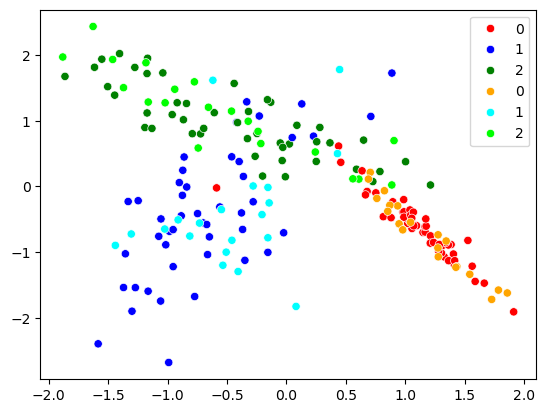

In [151]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# maak classificatie dataset 
X, y = make_classification(
    n_samples=200, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_repeated=0, 
    n_classes=3,
    n_clusters_per_class=1,
    class_sep=1
)
X = (X - X.mean())/X.std() # standaardiseer dataset (mean 0, variance 1)

# maak meshgrid om beslisgrenzen te laten zien
xmin = X[:, 0].min(); xmax = X[:, 0].max()
ymin = X[:, 1].min(); ymax = X[:, 1].max()
xx, yy = np.meshgrid(
    np.linspace(xmin-.5, xmax+.5, 100),
    np.linspace(ymin-.5, ymax+.5, 100)
)
D = np.vstack((xx.flatten(), yy.flatten())).T

# split de dataset in train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette=['r', 'b', 'g'])
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['orange', 'cyan', 'lime'])
plt.show()

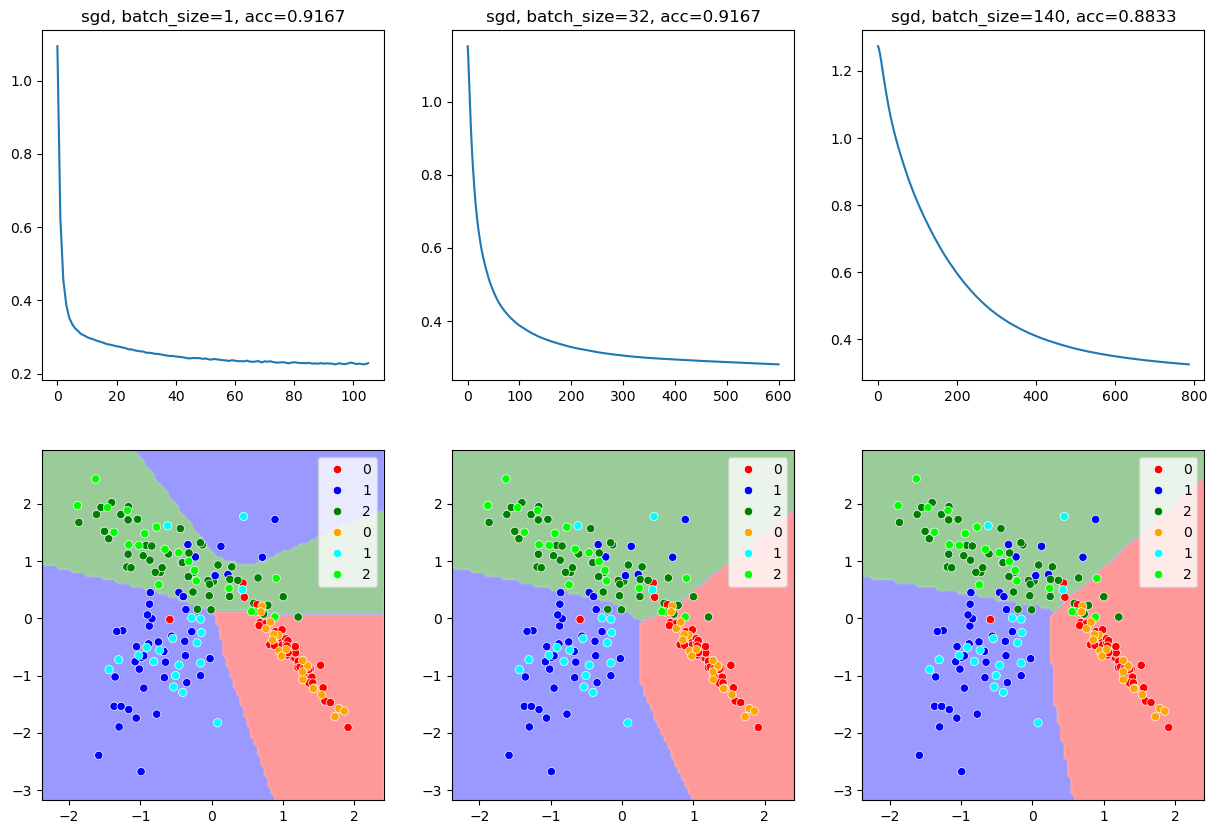

In [152]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
from matplotlib.colors import ListedColormap
cmap1 = ListedColormap(['red', 'blue', 'green'])

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

batch_sizes = [1, 32, X_train.shape[0]]

for i, b in enumerate(batch_sizes):
    mlp = MLPClassifier([10], batch_size=b, solver='sgd', max_iter=1000).fit(X, y)
    acc = mlp.score(X_test, y_test)
    axes[0, i].set_title(f"sgd, batch_size={b}, {acc=:.4f}")
    sns.lineplot(x=range(len(mlp.loss_curve_)), y=mlp.loss_curve_, ax=axes[0, i])

    y_pred = mlp.predict(D)
    
    axes[1, i].contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap1, alpha=0.4, antialiased=True)
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette=['r', 'b', 'g'], ax=axes[1, i])
    sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['orange', 'cyan', 'lime'], ax=axes[1, i])

## Pytorch

Pytorch is a deeplearning library that provides finer-grained control over the structure and type of model. 
In the following weeks we will use Pytorch for all deeplearning models. 

The key idea behind Pytorch is that you work with the `Tensor` object, which is a multi-dimensional array similar to `numpy` arrays. The key difference is that Pytorch maintains a computation graph for each computation that the `Tensor` objects are involved in. This allows us to perform backpropagation by working backwards on the computation graph and calculating the derivative of the loss with respect to each of the sub-computations. Naturally, the use of Pytorch is nice because it abstracts away the optimization step. 

We will first build a `torch` model, implement a `dataset`, and then implement a training loop

In [5]:
import torch
from torch import nn
from torch.nn import functional as F

First, we need a torch model. It consists of two layers, which we define in the `__init__` method. The first layer transforms the data from 2 dimensions to 10 dimensions, and the second transforms the data from 10 dimensions back to 3 dimensions. In other words, we have a network with 2 input nodes, 10 hidden nodes, followed by 3 output nodes. 

In [154]:
class MyCustomMLP(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 3)
        
    def forward(self, x):
        # input x must have shape: (batch_size, 2)
        
        # apply first linear layer followed by point-wise non-linear activation
        # in this case, we use the ReLU activation, which is commonly used
        # hidden activation z has shape: (batch_size, 10) 
        z = F.relu(self.fc1(x))

        # apply first linear layer followed by point-wise non-linear activation
        # output y must have shape: (batch_size, 3) 
        y = F.relu(self.fc2(z))

        return y

Next, we define a dataset object, which will make the training loop easier. The interface for this object tells us that we need to implement 2 mandatory methods:
- `__getitem__` should return a sample from the dataset using the `index` parameter  
- `__len__` should return the total length of the dataset 

In [155]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(
        self, 
        X: np.ndarray,
        y: np.ndarray,
    ):
        # convert data into torch tensors
        self.X = torch.tensor(X).to(torch.float32)
        self.y = torch.tensor(y).to(torch.long)
        
    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return len(self.X)

Now we implement the training loop. It will often have a similar structure:
```bash
for epoch in range(0...max_epochs)
    for batch in train dataloader:
        loss := training_step(model, batch)
        set all gradients to zero
        backpropagate
    
    use context with no gradient computation
        for batch in validation dataloader:
            val_loss := validation_step(model, batch)
            perform action based on val_loss (i.e., monitoring, early stopping, etc.)
    
use context with no gradient computation
    test_loss := 0
    for batch in test dataloader:
        test_loss := test_loss = test_step(model, batch)
    test_loss := test_loss / len(test dataloader)
```

In [163]:
# Training constants
learning_rate = 0.01
batch_size = 16
max_expochs = 100

In [164]:
# define model
model = MyCustomMLP()

# define optimizer (use stochastic gradient descent (SGD) or Adam)
optimizer = torch.optim.SGD(model.parameters(), learning_rate)

# loss function (cross-entropy because we are dealing with a classification problem)
criterion = nn.CrossEntropyLoss()

In [165]:
from torch.utils.data import DataLoader, random_split

# create dataset
dataset = CustomDataset(X, y)
# randomly split the dataset into train, validation, test sets
train_set, val_set, test_set = random_split(dataset, [0.8, 0.1, 0.1])

# create dataloaders from train, val, test sets
train_dataloader = DataLoader(train_set, batch_size, shuffle=True)
val_dataloader = DataLoader(val_set, batch_size, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size, shuffle=False)

In [166]:
# maintain history of train/val losses
train_losses = []
val_losses = []

for epoch in range(max_expochs):                                # In each epoch the entire training set is used for optimization 
    
    batch_loss = []
    for batch_X, batch_y in train_dataloader:                   # training set is batched
        
        y_pred = model(batch_X)                                 # predict y
        loss = criterion(y_pred, batch_y)                       # compute loss based on ground truth y and predict y 

        batch_loss.append(loss.item())

        optimizer.zero_grad()                                   # reset gradients to zero
        loss.backward()                                         # backpropagation
        optimizer.step()                                        # perform optimization step

    train_losses.append(sum(batch_loss) / len(batch_loss))
    
    with torch.no_grad():                                       # within this block, no gradients are computed

        batch_loss = []
        for batch_X, batch_y in val_dataloader:
            
            y_pred = model(batch_X)
            loss = criterion(y_pred, batch_y)

            batch_loss.append(loss.item())

        val_losses.append(sum(batch_loss) / len(batch_loss))

    print(f"{epoch=} \ttrain_loss = {train_losses[-1]:.4f}\tval_loss = {val_losses[-1]:.4f}")

epoch=0 	train_loss = 0.9689	val_loss = 0.8987
epoch=1 	train_loss = 0.9538	val_loss = 0.9285
epoch=2 	train_loss = 0.9406	val_loss = 0.9159
epoch=3 	train_loss = 0.9284	val_loss = 0.9391
epoch=4 	train_loss = 0.9176	val_loss = 0.9238
epoch=5 	train_loss = 0.9075	val_loss = 0.9338
epoch=6 	train_loss = 0.8980	val_loss = 0.9019
epoch=7 	train_loss = 0.8893	val_loss = 0.9192
epoch=8 	train_loss = 0.8812	val_loss = 0.9074
epoch=9 	train_loss = 0.8733	val_loss = 0.9318
epoch=10 	train_loss = 0.8659	val_loss = 0.8576
epoch=11 	train_loss = 0.8590	val_loss = 0.8294
epoch=12 	train_loss = 0.8522	val_loss = 0.8971
epoch=13 	train_loss = 0.8458	val_loss = 0.9461
epoch=14 	train_loss = 0.8401	val_loss = 0.8006
epoch=15 	train_loss = 0.8339	val_loss = 0.9151
epoch=16 	train_loss = 0.8283	val_loss = 0.8276
epoch=17 	train_loss = 0.8227	val_loss = 0.8128
epoch=18 	train_loss = 0.8176	val_loss = 0.7325
epoch=19 	train_loss = 0.8126	val_loss = 0.8028
epoch=20 	train_loss = 0.8078	val_loss = 0.7356
ep

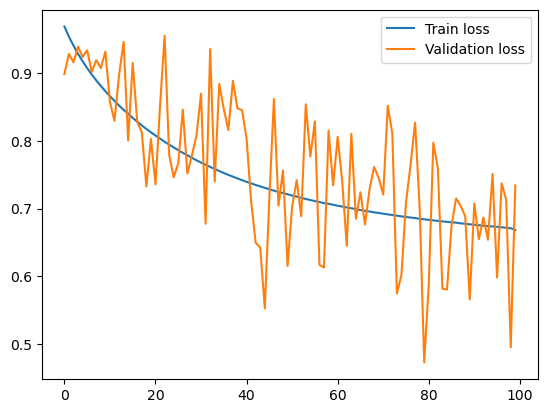

In [167]:
plt.plot(train_losses, label='Train loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()

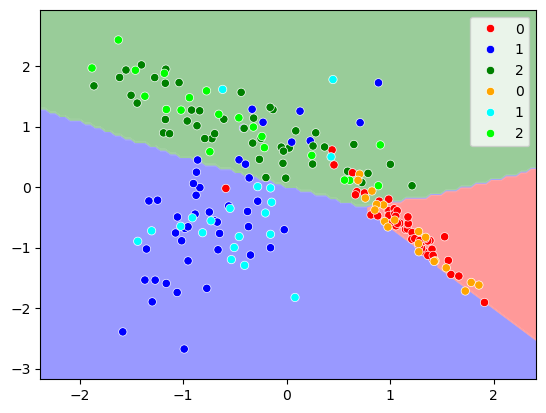

In [168]:
y_pred = model(torch.Tensor(D))

decisions = y_pred.reshape(*xx.shape, 3).argmax(dim=-1)

plt.contourf(xx, yy, decisions, cmap=cmap1, alpha=0.4, antialiased=True)
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette=['r', 'b', 'g'])
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['orange', 'cyan', 'lime'])
plt.show()

In [142]:
test_loss = 0

with torch.no_grad():

    for batch_X, batch_y in test_dataloader:
        
        y_pred = model(batch_X)
        loss = criterion(y_pred, batch_y)

        test_loss += loss.item()

test_loss / len(test_dataloader)

0.37899330258369446

## Another example in Pytorch

In this example, we consider a **binary classification problem**.

Given an input pair $x = (x_1, x_2)$, we want to predict whether the pair is of class `Red` or `Blue`.

We model the probability of the output $y$ given the input $x$ as
$$
    p(y=\text{red} | x)
$$
Naturally, the converse is simply
$$
    p(y=\text{blue} | x) = 1 - p(y=\text{red} | x)
$$

We can achieve an output that models this binary probability by using the `Sigmoid` activation on the very last layer.

For the dataset, we will make use of the `make_moons` function.

In [6]:
from sklearn.datasets import make_moons
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, n_samples, noise) -> None:
        super().__init__()
        self.X, self.y = make_moons(n_samples=n_samples, noise=noise)
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

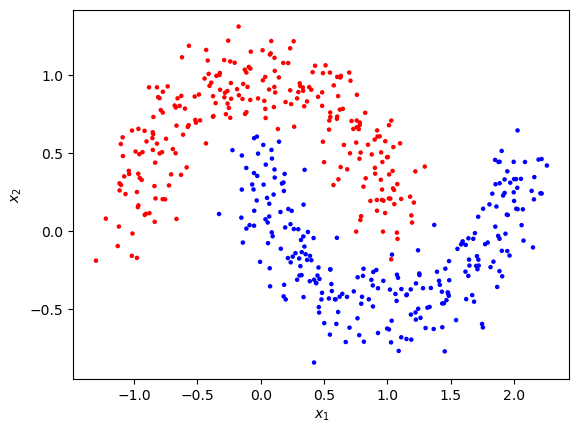

In [7]:
from matplotlib.colors import ListedColormap

col_palette = ['r', 'b']
cmap = ListedColormap(col_palette)

dataset = CustomDataset(n_samples=500, noise=0.15)
train, test, val = torch.utils.data.random_split(dataset, [0.8, 0.1, 0.1])

plt.scatter(x=dataset.X[:, 0], y=dataset.X[:, 1], s=5, c=dataset.y, cmap=cmap)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()

In this case, we use a very convenient torch construct called `Sequential` which acts as a sequential pipeline, making the forward pass more readable. 

In [8]:
n_hidden_units = 100
# run on GPU cuda if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

net = nn.Sequential(
    nn.Linear(in_features=2, out_features=n_hidden_units),
    nn.ReLU(),
    nn.Linear(in_features=n_hidden_units, out_features=2),
    nn.ReLU(),
    nn.Linear(in_features=2, out_features=1),
    nn.Sigmoid()
).to(device)

# since we have a single output value 
# that is considered as a binary probability, 
# we use the Binary Cross-Entropy (BCE) Loss 
criterion = nn.BCELoss()
optim = torch.optim.Adam(net.parameters(), lr=0.01)

train_history = []
val_history = []

net

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=2, bias=True)
  (3): ReLU()
  (4): Linear(in_features=2, out_features=1, bias=True)
  (5): Sigmoid()
)

Sometimes it is also interesting to inspect what the intermediate activations consist of. We can use forward hooks for this purpose by registering a hook on certain locations in the network and then saving the intermediate results in a dictionary. 

In [10]:
features = {} # dictionary to store intermediate results

def get_features(name):
    def hook(model, input, output):
        features[name] = output.detach()
    return hook

handle1 = net[2].register_forward_hook(get_features("linear_layer"))
handle2 = net[3].register_forward_hook(get_features("relu_layer"))

# these lists will be used to visualize the training process
hidden_linear_vals = []
hidden_relu_vals = []

### Training loop

epoch: 0	train loss: 0.0402	val loss: 0.1071
epoch: 10	train loss: 0.0390	val loss: 0.1081
epoch: 20	train loss: 0.0379	val loss: 0.1079
epoch: 30	train loss: 0.0368	val loss: 0.1058
epoch: 40	train loss: 0.0358	val loss: 0.1069
epoch: 50	train loss: 0.0348	val loss: 0.1027
epoch: 60	train loss: 0.0338	val loss: 0.1041
epoch: 70	train loss: 0.0329	val loss: 0.1062
epoch: 80	train loss: 0.0321	val loss: 0.1047
epoch: 90	train loss: 0.0312	val loss: 0.1048


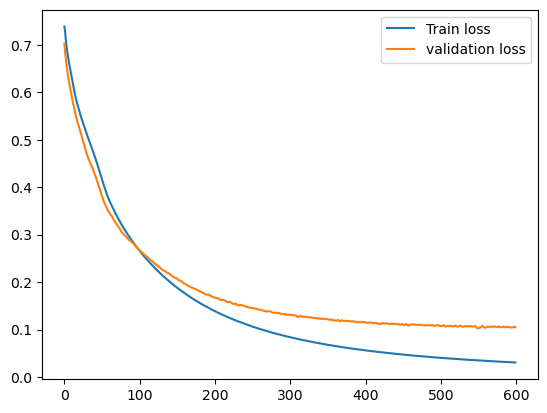

In [18]:
from torch.utils.data import DataLoader

EPOCHS = 100

train_loader = DataLoader(train, batch_size=len(train))
test_loader = DataLoader(test, batch_size=len(test))
val_loader = DataLoader(val, batch_size=len(val))

for e in range(EPOCHS):
    ### TRAIN
    batch_losses = []
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device).unsqueeze(-1)
        # forward pass
        y_preds = net(batch_x)
        loss = criterion(y_preds, batch_y)
        # backward pass
        optim.zero_grad()
        loss.backward()
        optim.step()
        # save loss value
        batch_losses.append(loss.item())
        hidden_linear_vals.append([features['linear_layer'], batch_y])
        hidden_relu_vals.append([features['relu_layer'], batch_y])
    
    train_history.append(np.mean(batch_losses))

    ### VALIDATE
    batch_losses = []
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device).unsqueeze(-1)
            y_preds = net(batch_x)
            loss = criterion(y_preds, batch_y)
            batch_losses.append(loss.item())
    val_history.append(np.mean(batch_losses))

    if e % 10 == 0: print(f"epoch: {e}\ttrain loss: {train_history[-1]:.4f}\tval loss: {val_history[-1]:.4f}")

plt.plot(train_history, label='Train loss')
plt.plot(val_history, label='validation loss')
plt.legend()

In [19]:
### TEST
with torch.no_grad():
    test_loss = 0
    for batch_x, batch_y in test_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device).unsqueeze(-1)
        y_preds = net(batch_x)
        loss = criterion(y_preds, batch_y)
        test_loss += loss.item()
    print(f"test loss: {test_loss / len(test_loader)}")

test loss: 0.03696976229548454


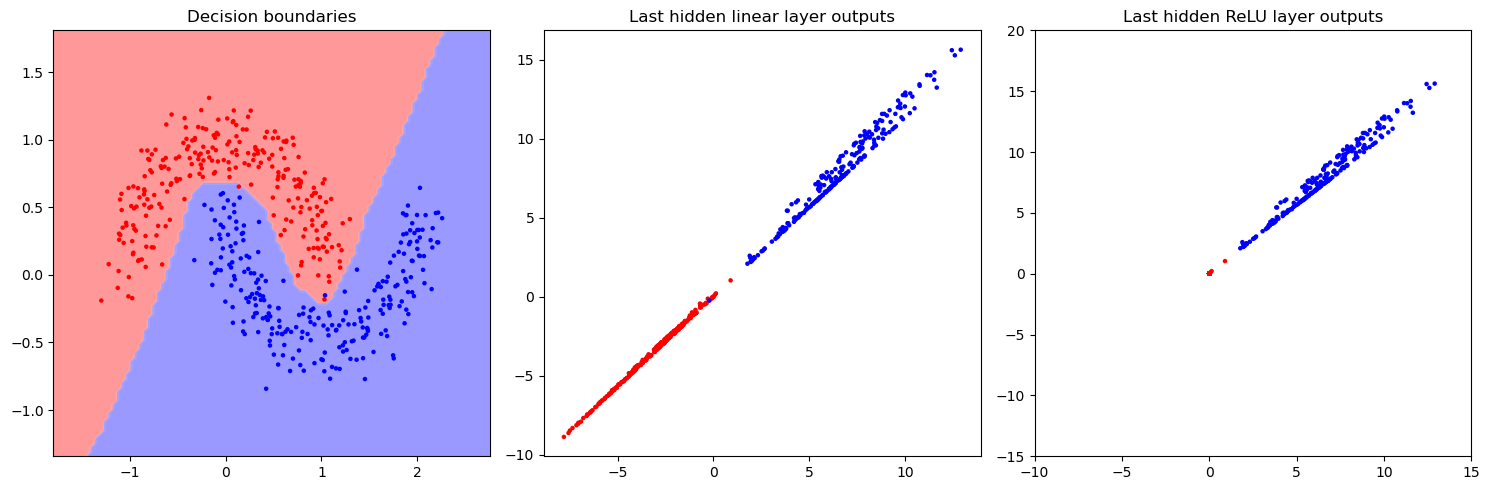

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# create meshgrid to visualize the decision boundaries
xmin = dataset.X[:, 0].min(); xmax = dataset.X[:, 0].max()
ymin = dataset.X[:, 1].min(); ymax = dataset.X[:, 1].max()
xx, yy = torch.meshgrid(
    torch.linspace(xmin-.5, xmax+.5, 100),
    torch.linspace(ymin-.5, ymax+.5, 100),
    indexing='ij'
)
D = torch.vstack((xx.flatten(), yy.flatten())).T

# contour
y_cont = net(D.to(device)).cpu()
y_cont = (y_cont > 0.5)*1

# dataset
_ = net(dataset.X.to(device)).cpu()
h_data = features['linear_layer'].cpu()
r_data = features['relu_layer'].cpu()

# plot on both axes
ax1.contourf(xx.numpy(), yy.numpy(), y_cont.reshape(xx.shape), cmap=cmap, alpha=0.4, antialiased=True)
ax1.scatter(dataset.X[:, 0], dataset.X[:, 1], s=5, c=dataset.y, cmap=cmap)
ax1.set_title("Decision boundaries")

ax2.scatter(h_data[:, 0], h_data[:, 1], s=5, c=dataset.y, cmap=cmap)
ax2.set_title("Last hidden linear layer outputs")

ax3.scatter(r_data[:, 0], r_data[:, 1], s=5, c=dataset.y, cmap=cmap)
ax3.set_title("Last hidden ReLU layer outputs")

ax3.set_xticks(ax2.get_xticks())
ax3.set_yticks(ax2.get_yticks())

plt.tight_layout()

Uncomment the following cell to animate the learning process as an `.mp4` file. 
Notice that the last hidden linear layer learns to separate the red and blue regions, leading to nicely defined decision boundaries. 

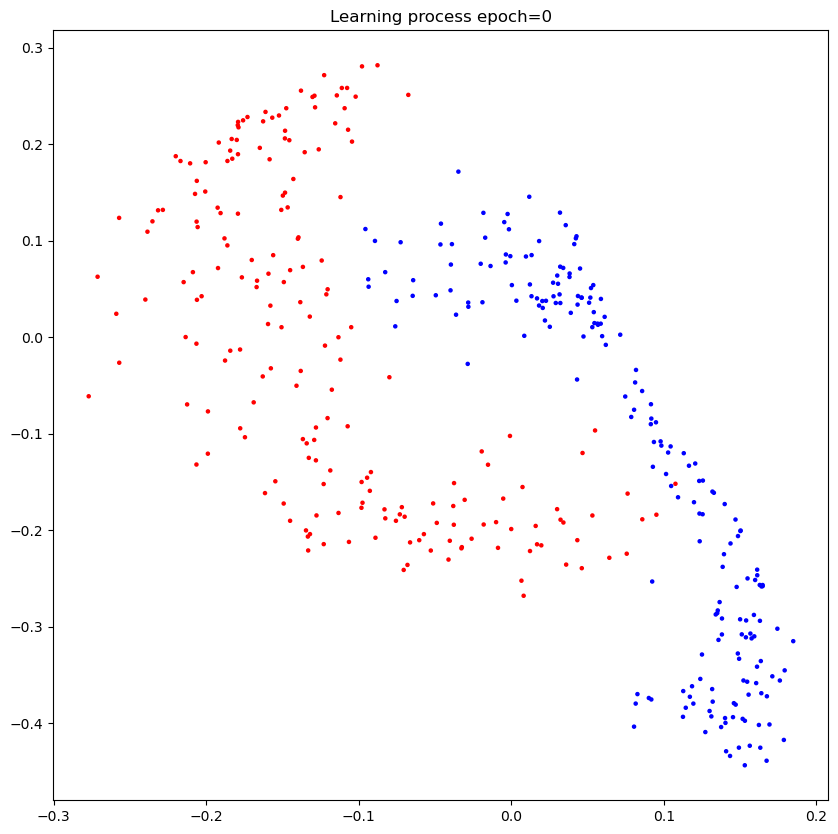

In [23]:
# from matplotlib import animation

# fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharex=True, sharey=True)
# ax.set_xlabel(r'$h_1$')
# ax.set_ylabel(r'$h_2$')
# # sc = ax.scatter([], [])

# def animate(i):
#     # global sc
#     x = hidden_linear_vals[i][0].cpu()
#     y = hidden_linear_vals[i][1].cpu()
#     ax.clear()
#     # sc.set_alpha(0.2)
#     sc = ax.scatter(x=x[:, 0], y=x[:, 1], s=5, c=y, cmap=cmap)
#     ax.set_title(f'Learning process epoch={i}')
#     return sc

# anim = animation.FuncAnimation(fig, animate, frames=len(hidden_linear_vals), repeat=False, interval=1)
# anim.save('../datasets/training_animation.mp4', writer=animation.FFMpegWriter(fps=10))